# Imports

In [32]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf

#Deep learning API for Neural Network
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#Scikit-learn ML libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#For accessing files and file names
import pathlib
import os

#for downloading data
import zipfile

# Unzip file

In [33]:
#Unzip file
my_files = zipfile.ZipFile('Hotdog_Pizza.zip')
my_files.extractall()
my_files.close()

# Analyze the Data

In [34]:
#Random Display Image
def display_random_image(dir, class_type):
  img_dir = dir + '/' + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')
  print(f'Image Shape: {img.shape}')

Image Shape: (512, 512, 3)


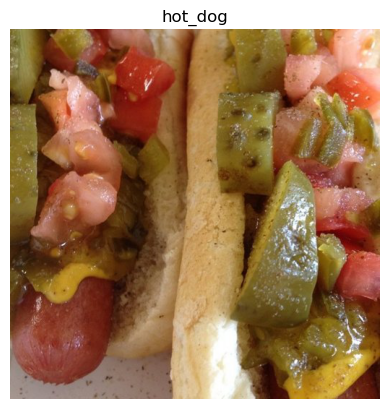

In [35]:
display_random_image("Hotdog_Pizza/", "hot_dog")

Image Shape: (512, 512, 3)


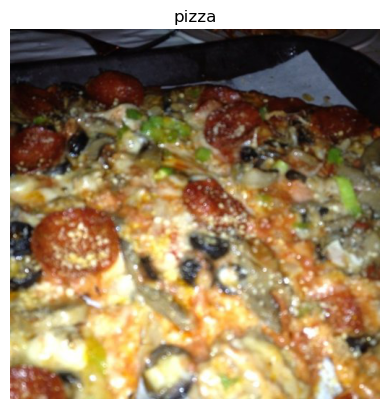

In [36]:
display_random_image("Hotdog_Pizza/", "pizza")

# Preparing the Data

In [37]:
#256x256 (Batches of 32 Images)
data_dir = "Hotdog_Pizza/"
training_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split = 0.2,
                                                            subset = 'training',
                                                            batch_size = 32,
                                                            image_size = (256, 256),
                                                            seed = 42)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split = 0.2,
                                                            subset = 'validation',
                                                            batch_size = 32,
                                                            image_size = (256, 256),
                                                            seed = 42)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [38]:
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


# Normalize the Data

In [39]:
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [40]:
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.38088238, 0.35931376, 0.45539218],
        [0.3392157 , 0.30784315, 0.39558825],
        [0.29215688, 0.26666668, 0.32941177],
        ...,
        [0.4401961 , 0.43235296, 0.6176471 ],
        [0.4279412 , 0.42352945, 0.5975491 ],
        [0.42598042, 0.4142157 , 0.58382356]],

       [[0.3926471 , 0.37549022, 0.4671569 ],
        [0.33774513, 0.3151961 , 0.39852944],
        [0.29362747, 0.26813728, 0.33088237],
        ...,
        [0.42549023, 0.4264706 , 0.6117647 ],
        [0.43088236, 0.425     , 0.6034314 ],
        [0.42598042, 0.42009807, 0.5926471 ]],

       [[0.39362746, 0.38137257, 0.4671569 ],
        [0.36813727, 0.3519608 , 0.4279412 ],
        [0.32058826, 0.29656863, 0.35882354],
        ...,
        [0.4166667 , 0.42156866, 0.61029416],
        [0.425     , 0.429902  , 0.6151961 ],
        [0.42205885, 0.42254904, 0.60196084]],

       ...,

       [[0.49411768, 0.34117648, 0.28235295],
        [0.50

# Non-CNN Model on the Data

In [10]:
tf.random.set_seed(42)

model_1 = Sequential([
    Flatten(input_shape = (256, 256, 3)),
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(training_data_norm,
                        epochs = 5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 6s 97ms/step - loss: 0.9227 - accuracy: 0.4988 - val_loss: 0.6937 - val_accuracy: 0.4550
Epoch 2/5
50/50 [==============================] - 3s 60ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6939 - val_accuracy: 0.4550
Epoch 3/5
50/50 [==============================] - 3s 62ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6942 - val_accuracy: 0.4550
Epoch 4/5
50/50 [==============================] - 3s 60ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6942 - val_accuracy: 0.4550
Epoch 5/5
50/50 [==============================] - 3s 60ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6944 - val_accuracy: 0.4550


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 4)                 786436    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786461 (3.00 MB)
Trainable params: 786461 (3.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Non-Cnn model with more layers

In [12]:
tf.random.set_seed(42)

model_2 = Sequential([
    Flatten(input_shape = (256, 256, 3)),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(training_data_norm,
                        epochs = 5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 12s 209ms/step - loss: 1.5869 - accuracy: 0.5519 - val_loss: 0.5918 - val_accuracy: 0.6950
Epoch 2/5
50/50 [==============================] - 11s 208ms/step - loss: 0.7419 - accuracy: 0.6244 - val_loss: 0.6282 - val_accuracy: 0.6700
Epoch 3/5
50/50 [==============================] - 11s 205ms/step - loss: 0.6190 - accuracy: 0.6756 - val_loss: 0.5783 - val_accuracy: 0.7025
Epoch 4/5
50/50 [==============================] - 10s 203ms/step - loss: 0.6220 - accuracy: 0.6756 - val_loss: 0.6425 - val_accuracy: 0.6450
Epoch 5/5
50/50 [==============================] - 11s 209ms/step - loss: 0.5424 - accuracy: 0.7269 - val_loss: 0.6261 - val_accuracy: 0.6825


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_3 (Dense)             (None, 50)                9830450   
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9838151 (37.53 MB)
Trainable params: 983

# Cnn Model Preparation

In [41]:
len(training_data_norm), 1600/32

(50, 50.0)

In [15]:
model_3 = tf.keras.models.Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu',
           input_shape = (256,256, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(training_data_norm,
                        epochs = 5,
                        steps_per_epoch = len(training_data_norm),
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 93s 2s/step - loss: 0.9016 - accuracy: 0.5981 - val_loss: 0.6549 - val_accuracy: 0.6175
Epoch 2/5
50/50 [==============================] - 79s 2s/step - loss: 0.5665 - accuracy: 0.7144 - val_loss: 0.6354 - val_accuracy: 0.6725
Epoch 3/5
50/50 [==============================] - 78s 2s/step - loss: 0.4568 - accuracy: 0.7937 - val_loss: 0.5603 - val_accuracy: 0.7550
Epoch 4/5
50/50 [==============================] - 78s 2s/step - loss: 0.2759 - accuracy: 0.8950 - val_loss: 0.5761 - val_accuracy: 0.7475
Epoch 5/5
50/50 [==============================] - 77s 2s/step - loss: 0.1164 - accuracy: 0.9694 - val_loss: 0.6489 - val_accuracy: 0.7800


# Plot Loss and Accuracy

<Axes: >

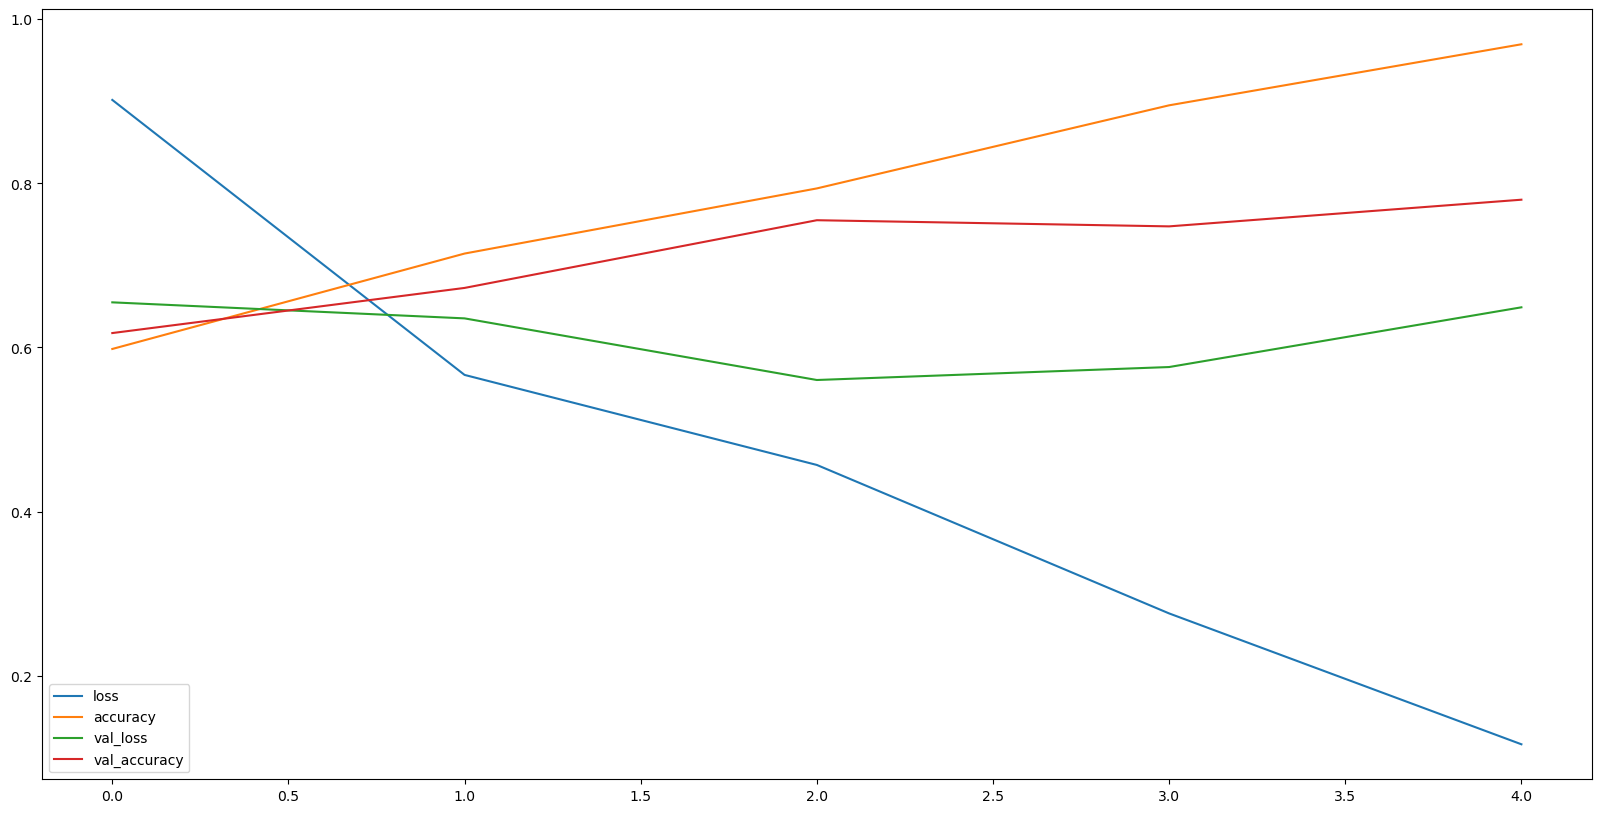

In [18]:
pd.DataFrame(history_3.history).plot(figsize = (20, 10))

# Reduce Overfitting with Pooling

In [22]:
model_4 = tf.keras.models.Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu',
           input_shape = (256,256, 3)),
    MaxPool2D(pool_size = 2,
              padding = 'valid'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(training_data_norm,
                        epochs = 5,
                        steps_per_epoch = len(training_data_norm),
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 30s 562ms/step - loss: 0.6278 - accuracy: 0.6431 - val_loss: 0.5779 - val_accuracy: 0.7075
Epoch 2/5
50/50 [==============================] - 30s 594ms/step - loss: 0.5511 - accuracy: 0.7150 - val_loss: 0.5621 - val_accuracy: 0.7325
Epoch 3/5
50/50 [==============================] - 25s 477ms/step - loss: 0.5153 - accuracy: 0.7481 - val_loss: 0.5199 - val_accuracy: 0.7425
Epoch 4/5
50/50 [==============================] - 24s 473ms/step - loss: 0.4946 - accuracy: 0.7619 - val_loss: 0.4990 - val_accuracy: 0.7675
Epoch 5/5
50/50 [==============================] - 24s 473ms/step - loss: 0.4217 - accuracy: 0.7987 - val_loss: 0.4862 - val_accuracy: 0.7750


<Axes: >

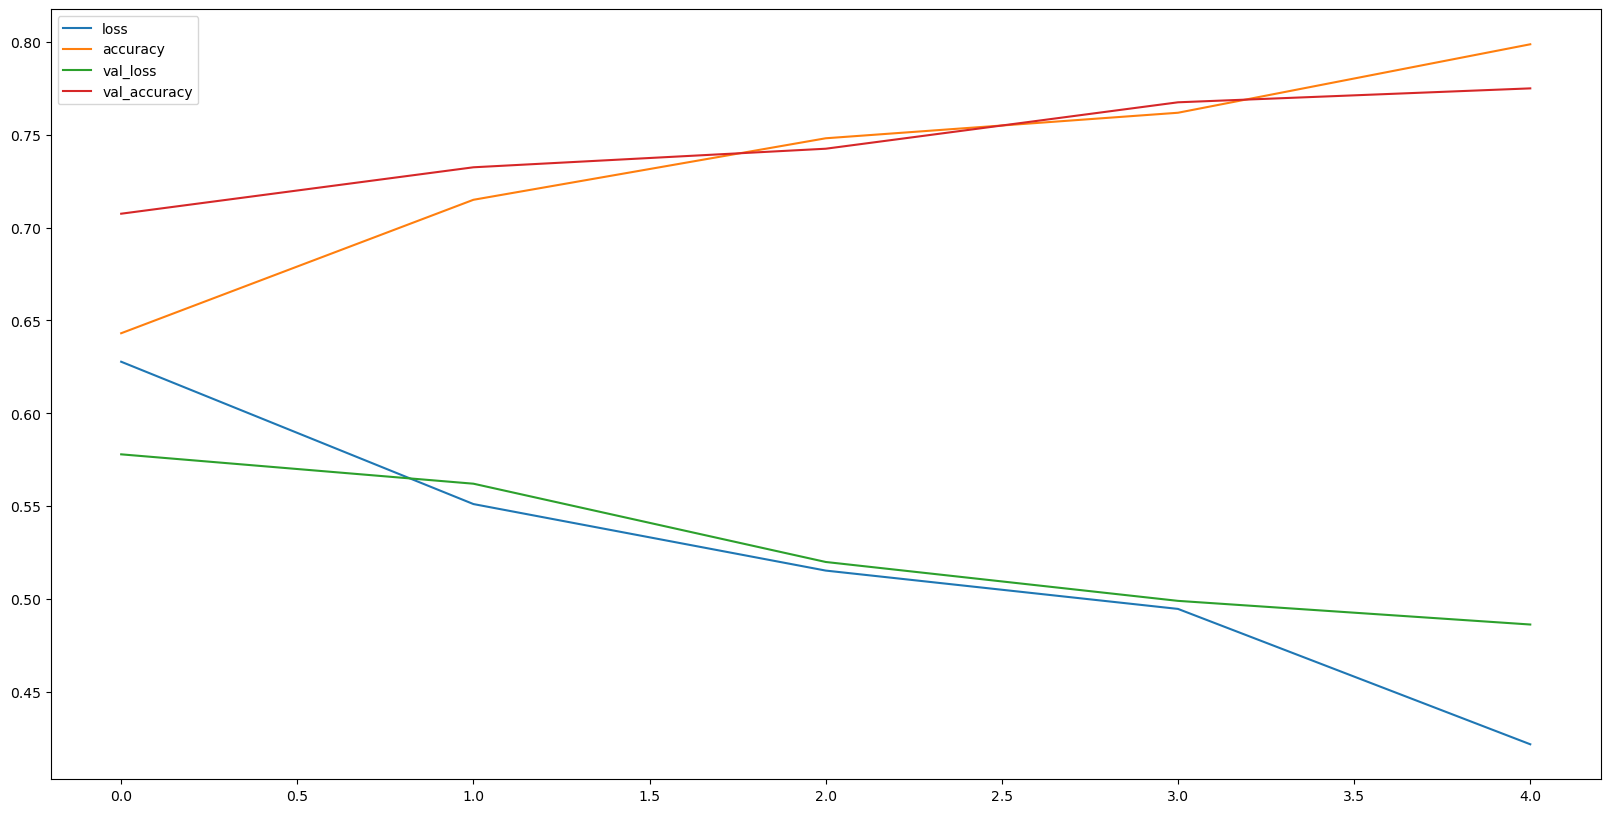

In [23]:
pd.DataFrame(history_4.history).plot(figsize = (20, 10))

# Add more Data with Augmentation to avoid overfitting

In [25]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [26]:
model_5 = tf.keras.models.Sequential([
    data_augmentation,
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu',
           input_shape = (256,256, 3)),
    MaxPool2D(pool_size = 2,
              padding = 'valid'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(training_data_norm,
                        epochs = 5,
                        steps_per_epoch = len(training_data_norm),
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 36s 676ms/step - loss: 0.6204 - accuracy: 0.6587 - val_loss: 0.5712 - val_accuracy: 0.7125
Epoch 2/5
50/50 [==============================] - 33s 655ms/step - loss: 0.5798 - accuracy: 0.7013 - val_loss: 0.5426 - val_accuracy: 0.7400
Epoch 3/5
50/50 [==============================] - 34s 676ms/step - loss: 0.5513 - accuracy: 0.7169 - val_loss: 0.5337 - val_accuracy: 0.7700
Epoch 4/5
50/50 [==============================] - 33s 655ms/step - loss: 0.5262 - accuracy: 0.7344 - val_loss: 0.4990 - val_accuracy: 0.7625
Epoch 5/5
50/50 [==============================] - 29s 571ms/step - loss: 0.4911 - accuracy: 0.7606 - val_loss: 0.4979 - val_accuracy: 0.7675


<Axes: >

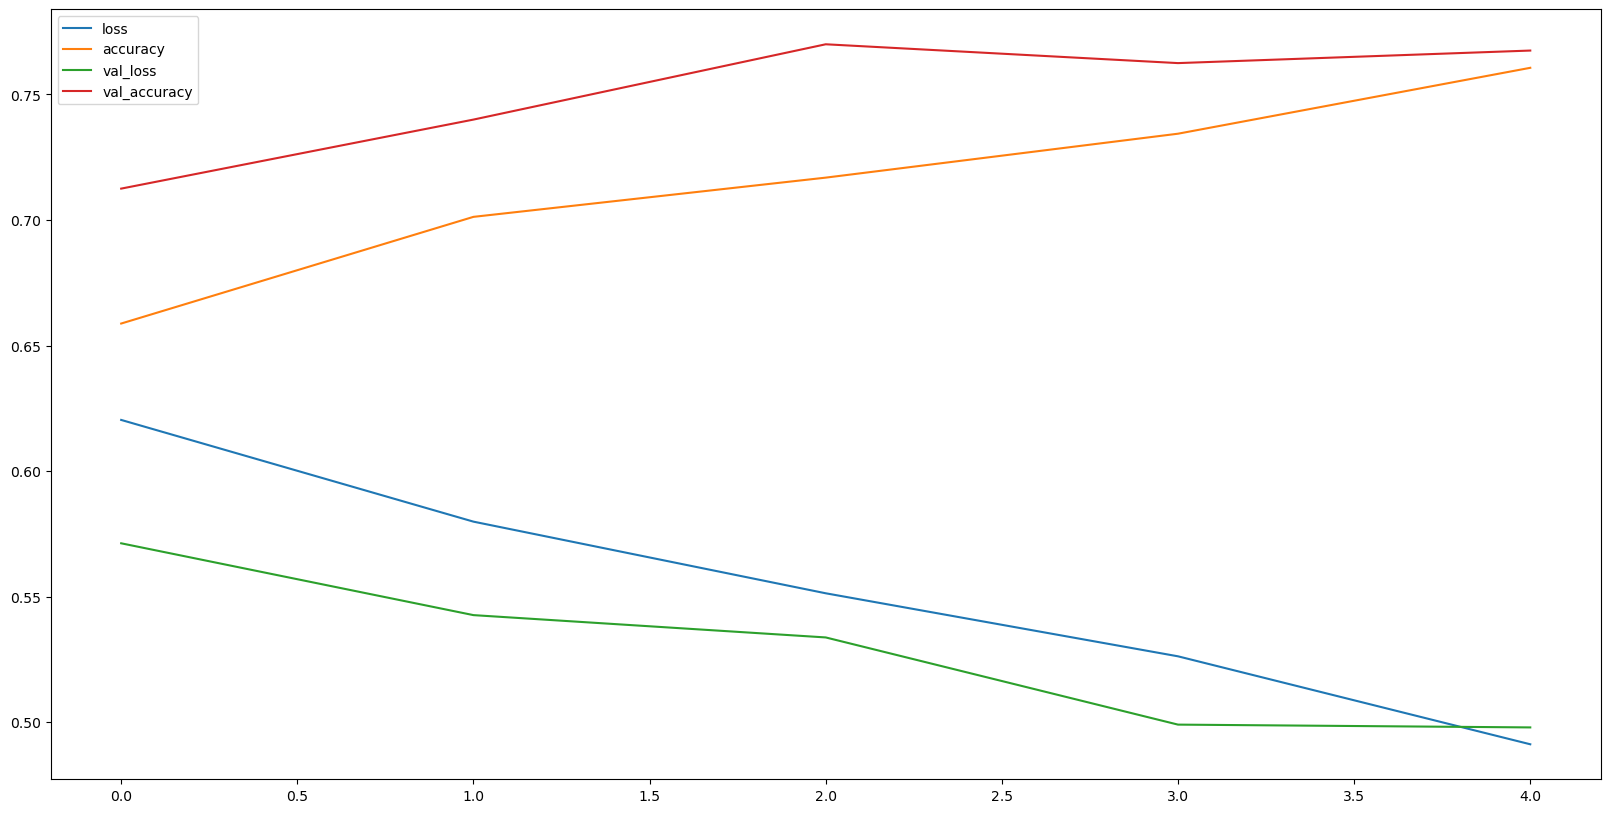

In [27]:
pd.DataFrame(history_5.history).plot(figsize = (20, 10))

# Make Predition using custom image

(-0.5, 1799.5, 2559.5, -0.5)

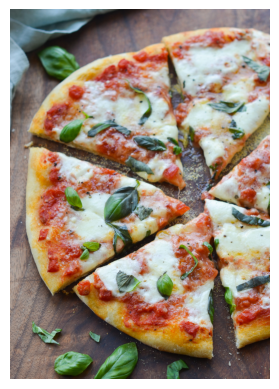

In [61]:
my_pizza = mpimg.imread("pizza_num3.jpg")
plt.imshow(my_pizza)
plt.axis(False)

In [62]:
my_pizza.shape

(2560, 1800, 3)

In [63]:
#I normalize ang new data
my_pizza

array([[[ 66,  80,  80],
        [ 66,  80,  80],
        [ 66,  80,  80],
        ...,
        [130, 126, 149],
        [127, 125, 147],
        [121, 119, 141]],

       [[ 66,  80,  80],
        [ 66,  80,  80],
        [ 66,  80,  80],
        ...,
        [124, 120, 143],
        [119, 117, 139],
        [113, 111, 133]],

       [[ 66,  80,  80],
        [ 66,  80,  80],
        [ 66,  80,  80],
        ...,
        [124, 122, 144],
        [122, 120, 144],
        [117, 115, 139]],

       ...,

       [[119, 103, 103],
        [ 91,  76,  73],
        [106,  91,  88],
        ...,
        [ 96,  72,  68],
        [ 91,  72,  68],
        [100,  82,  80]],

       [[134, 118, 118],
        [124, 109, 106],
        [142, 127, 124],
        ...,
        [100,  76,  72],
        [113,  94,  90],
        [148, 130, 128]],

       [[165, 149, 149],
        [152, 137, 134],
        [157, 142, 139],
        ...,
        [104,  80,  76],
        [106,  87,  83],
        [122, 104, 102]]

In [64]:
my_pizza = tf.io.read_file('pizza_num3.jpg')

#himuon ang file into tensor
my_pizza = tf.image.decode_image(my_pizza)

#I Resize ang image
my_pizza = tf.image.resize(my_pizza, size=[256, 256])

#I Normalize ang data
my_pizza = my_pizza / 255

my_pizza

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.2509804 , 0.3137255 , 0.30980393],
        [0.25891545, 0.3138174 , 0.3138174 ],
        [0.26651347, 0.32141545, 0.32141545],
        ...,
        [0.54859066, 0.5363664 , 0.57965684],
        [0.50242037, 0.49083945, 0.5569547 ],
        [0.47074142, 0.47264093, 0.560815  ]],

       [[0.25882354, 0.3137255 , 0.3137255 ],
        [0.25490198, 0.31764707, 0.3137255 ],
        [0.25490198, 0.31764707, 0.3137255 ],
        ...,
        [0.5138787 , 0.4981924 , 0.5648591 ],
        [0.49617034, 0.48440564, 0.5667586 ],
        [0.47257966, 0.46473652, 0.5587316 ]],

       [[0.2627451 , 0.3254902 , 0.32156864],
        [0.26862746, 0.32352942, 0.32352942],
        [0.27058825, 0.33333334, 0.32941177],
        ...,
        [0.4981924 , 0.4864277 , 0.56878066],
        [0.4958946 , 0.49393383, 0.574326  ],
        [0.49019608, 0.4745098 , 0.5647059 ]],

       ...,

       [[0.5206801 , 0.43048406, 0.3991115 ],
        [0.53

In [65]:
prediction = model_5.predict(tf.expand_dims(my_pizza, axis = 0))
prediction

1/1 [==============================] - 0s 20ms/step


array([[0.70837945]], dtype=float32)

In [66]:
predicted_class = class_names[int(tf.round(prediction))]
predicted_class

'pizza'

# Save and Load the Model

In [67]:
model_5.save('Binary_CNN_Model_5')

INFO:tensorflow:Assets written to: Binary_CNN_Model_5\assets


INFO:tensorflow:Assets written to: Binary_CNN_Model_5\assets


In [68]:
saved_model_5 = tf.keras.models.load_model('Binary_CNN_Model_5')
saved_model_5.evaluate(validation_data_norm)

13/13 [==============================] - 2s 130ms/step - loss: 0.4979 - accuracy: 0.7675


[0.49785664677619934, 0.7674999833106995]